In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
pip install lancedb

Note: you may need to restart the kernel to use updated packages.


In [2]:
import lancedb

In [2]:
!pip install open_clip_torch

In [3]:
import open_clip

In [ ]:
model, preprocess = open_clip.create_model_from_pretrained('hf-hub:laion/CLIP-ViT-g-14-laion2B-s12B-b42K')
tokenizer = open_clip.get_tokenizer('hf-hub:laion/CLIP-ViT-g-14-laion2B-s12B-b42K')

In [3]:
from lancedb.embeddings import EmbeddingFunctionRegistry

registry = EmbeddingFunctionRegistry.get_instance()
clip = registry.get("open-clip").create()

In [4]:
clip

OpenClipEmbeddings(max_retries=7, name='ViT-B-32', pretrained='laion2b_s34b_b79k', device='cpu', batch_size=64, normalize=True)

In [8]:
from PIL import Image
from lancedb.pydantic import LanceModel, Vector

class Pets(LanceModel):
    vector: Vector(clip.ndims()) = clip.VectorField()
    image_uri: str = clip.SourceField()

    @property
    def image(self):
        return Image.open(self.image_uri)

In [9]:
db = lancedb.connect("/lancedb")

In [7]:
db.drop_table("pets")

In [10]:
import pandas as pd
from pathlib import Path
from random import sample

if "pets" in db:
    table = db["pets"]
else:
    table = db.create_table("pets", schema=Pets)
    local_folder = "C:/Users/f.zarei/VDB/images1/images"  
    p = Path(local_folder).expanduser()
    # p = Path("/content/gdrive/MyDrive/images/images").expanduser()
    uris = [str(f) for f in p.glob("*.jpg")]
    uris = sample(uris, 1000)
    table.add(pd.DataFrame({"image_uri": uris}))

  0%|          | 0/64 [00:00<?, ?it/s]
 Retrying in 2.9816627199785453 seconds (retry 1 of 7) 

  0%|          | 0/64 [00:00<?, ?it/s]
 Retrying in 6.585206214081499 seconds (retry 2 of 7) 

  0%|          | 0/64 [00:00<?, ?it/s]
 Retrying in 20.479146824608957 seconds (retry 3 of 7) 

  0%|          | 0/64 [00:00<?, ?it/s]
 Retrying in 71.20177581982733 seconds (retry 4 of 7) 

  0%|          | 0/64 [00:00<?, ?it/s]
 Retrying in 168.80799262084489 seconds (retry 5 of 7) 

  0%|          | 0/64 [00:00<?, ?it/s]
 Retrying in 381.1360585411579 seconds (retry 6 of 7) 

  0%|          | 0/64 [00:00<?, ?it/s]
 Retrying in 831.305721436767 seconds (retry 7 of 7) 

  0%|          | 0/64 [00:00<?, ?it/s]


RuntimeError: lance error: LanceError(Arrow): Arrow error: C Data interface error: Unknown error: ('Maximum number of retries (7) exceeded.', NotImplementedError('Only local and http(s) urls are supported')). Detail: Python exception: Traceback (most recent call last):
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\site-packages\lancedb\embeddings\utils.py", line 265, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\site-packages\lancedb\embeddings\open_clip.py", line 114, in compute_source_embeddings
    embeddings.extend(self._parallel_get(batch))
                      ~~~~~~~~~~~~~~~~~~^^^^^^^
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\site-packages\lancedb\embeddings\open_clip.py", line 126, in _parallel_get
    return [future.result() for future in tqdm(futures)]
            ~~~~~~~~~~~~~^^
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\concurrent\futures\_base.py", line 449, in result
    return self.__get_result()
           ~~~~~~~~~~~~~~~~~^^
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\concurrent\futures\_base.py", line 401, in __get_result
    raise self._exception
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\concurrent\futures\thread.py", line 59, in run
    result = self.fn(*self.args, **self.kwargs)
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\site-packages\lancedb\embeddings\open_clip.py", line 142, in generate_image_embedding
    image = self._to_pil(image)
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\site-packages\lancedb\embeddings\open_clip.py", line 163, in _to_pil
    raise NotImplementedError("Only local and http(s) urls are supported")
NotImplementedError: Only local and http(s) urls are supported

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\site-packages\lancedb\table.py", line 313, in gen
    for batch in reader:
                 ^^^^^^
  File "pyarrow/ipc.pxi", line 703, in pyarrow.lib.RecordBatchReader.__next__
  File "pyarrow/ipc.pxi", line 737, in pyarrow.lib.RecordBatchReader.read_next_batch
  File "pyarrow/error.pxi", line 89, in pyarrow.lib.check_status
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\site-packages\lancedb\table.py", line 3096, in gen
    for batch in reader:
                 ^^^^^^
  File "pyarrow/ipc.pxi", line 703, in pyarrow.lib.RecordBatchReader.__next__
  File "pyarrow/ipc.pxi", line 737, in pyarrow.lib.RecordBatchReader.read_next_batch
  File "pyarrow/error.pxi", line 89, in pyarrow.lib.check_status
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\site-packages\lancedb\table.py", line 518, in gen
    col_data = func.compute_source_embeddings_with_retry(
        batch[conf.source_column]
    )
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\site-packages\lancedb\embeddings\base.py", line 146, in compute_source_embeddings_with_retry
    return retry_with_exponential_backoff(
           ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        self.compute_source_embeddings, max_retries=self.max_retries
        ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    )(*args, **kwargs)
    ~^^^^^^^^^^^^^^^^^
  File "C:\Users\f.zarei\AppData\Local\anaconda3\Lib\site-packages\lancedb\embeddings\utils.py", line 275, in wrapper
    raise Exception(
        f"Maximum number of retries ({max_retries}) exceeded.", e
    )
Exception: ('Maximum number of retries (7) exceeded.', NotImplementedError('Only local and http(s) urls are supported'))
, C:\Users\runneradmin\.cargo\registry\src\index.crates.io-1949cf8c6b5b557f\lance-datafusion-1.0.1\src\utils.rs:51:31

In [ ]:

table_list = db.list_tables()
print(f"Tables in database: {table_list}")

In [ ]:
table.head().to_pandas()

In [40]:
rs = table_pets.search("cat").limit(3).to_pydantic(Pets)
rs[2].image

IndexError: list index out of range

In [41]:
rs = table_pets.search("cat").limit(3).to_pydantic(Pets)
print(f"Number of results: {len(rs)}")

Number of results: 0


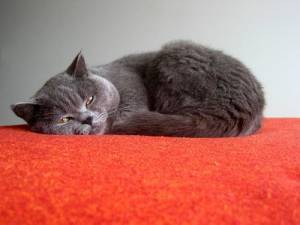

In [18]:
from PIL import Image
p = Path("/content/gdrive/MyDrive/images/images/British_Shorthair_241.jpg").expanduser()
query_image = Image.open(p)
query_image

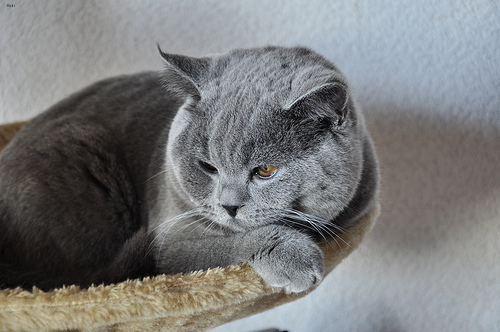

In [21]:
rs = table.search(query_image).limit(3).to_pydantic(Pets)
rs[1].image